In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
for dirname, _, filenames in os.walk('./Dataset/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2
./Dataset/test\glioma\1848.jpg
./Dataset/test\glioma\1882.jpg
./Dataset/test\glioma\1883.jpg
./Dataset/test\glioma\1915.jpg
./Dataset/test\glioma\1918.jpg
./Dataset/test\glioma\1923.jpg
./Dataset/test\glioma\1927.jpg
./Dataset/test\glioma\1952.jpg
./Dataset/test\glioma\1974.jpg
./Dataset/test\glioma\1978.jpg
./Dataset/test\glioma\1986.jpg
./Dataset/test\glioma\1994.jpg
./Dataset/test\glioma\1996.jpg
./Dataset/test\glioma\2004.jpg
./Dataset/test\glioma\2006.jpg
./Dataset/test\glioma\2010.jpg
./Dataset/test\glioma\2021.jpg
./Dataset/test\glioma\2024.jpg
./Dataset/test\glioma\2032.jpg
./Dataset/test\glioma\2048.jpg
./Dataset/test\glioma\2049.jpg
./Dataset/test\glioma\2065.jpg
./Dataset/test\glioma\2068.jpg
./Dataset/test\glioma\2078.jpg
./Dataset/test\glioma\2080.jpg
./Dataset/test\gli

./Dataset/train\meningioma\m3 (78).jpg
./Dataset/train\meningioma\m3 (79).jpg
./Dataset/train\meningioma\m3 (8).jpg
./Dataset/train\meningioma\m3 (80).jpg
./Dataset/train\meningioma\m3 (81).jpg
./Dataset/train\meningioma\m3 (82).jpg
./Dataset/train\meningioma\m3 (83).jpg
./Dataset/train\meningioma\m3 (84).jpg
./Dataset/train\meningioma\m3 (85).jpg
./Dataset/train\meningioma\m3 (86).jpg
./Dataset/train\meningioma\m3 (88).jpg
./Dataset/train\meningioma\m3 (89).jpg
./Dataset/train\meningioma\m3 (9).jpg
./Dataset/train\meningioma\m3 (90).jpg
./Dataset/train\meningioma\m3 (91).jpg
./Dataset/train\meningioma\m3 (92).jpg
./Dataset/train\meningioma\m3 (93).jpg
./Dataset/train\meningioma\m3 (96).jpg
./Dataset/train\meningioma\m3 (97).jpg
./Dataset/train\meningioma\m3 (99).jpg
./Dataset/train\no_tumor\1.jpg
./Dataset/train\no_tumor\2.jpg
./Dataset/train\no_tumor\3.jpg
./Dataset/train\no_tumor\4.jpg
./Dataset/train\no_tumor\5.jpg
./Dataset/train\no_tumor\6.jpg
./Dataset/train\no_tumor\7.jpg
./Dat

In [2]:
labels = ['glioma','meningioma','no_tumor','pituitary']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

In [3]:
X_train = []
y_train = []
X_test = []
y_test = []
image_size = 150
for label_name in labels:
    folderPath = os.path.join('.','Dataset','train',label_name)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(label_name)
        
for label_name in labels:
    folderPath = os.path.join('.','Dataset','test',label_name)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_test.append(img)
        y_test.append(label_name)
        
    
                
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

100%|███████████████████████████████████████████████████████████████████████████████| 184/184 [00:00<00:00, 514.32it/s]


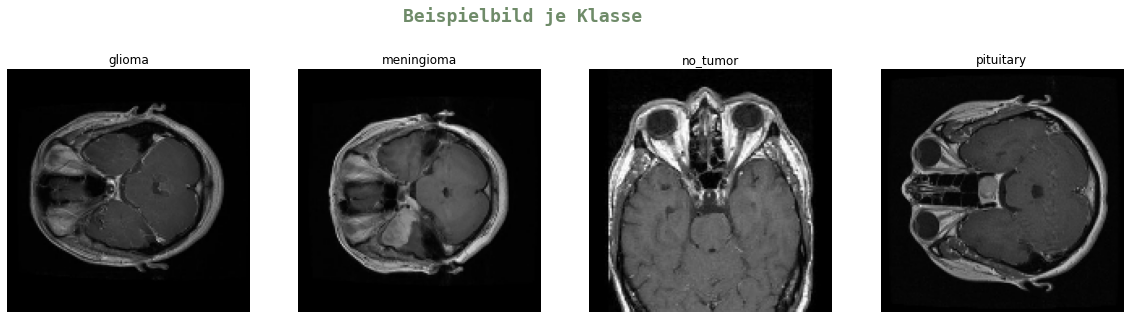

In [5]:
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Beispielbild je Klasse',size=18,fontweight='bold',
             fontname='monospace',color=colors_green[1],y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

In [8]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [9]:
effnet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))

In [10]:
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)

In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 150, 150, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 150, 150, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 151, 151, 3)  0           normalization[0][0]              
______________________________________________________________________________________________

In [12]:
for i, layer in enumerate(model.layers):
    print(i, layer.name, "-", layer.trainable)

0 input_1 - True
1 rescaling - True
2 normalization - True
3 stem_conv_pad - True
4 stem_conv - True
5 stem_bn - True
6 stem_activation - True
7 block1a_dwconv - True
8 block1a_bn - True
9 block1a_activation - True
10 block1a_se_squeeze - True
11 block1a_se_reshape - True
12 block1a_se_reduce - True
13 block1a_se_expand - True
14 block1a_se_excite - True
15 block1a_project_conv - True
16 block1a_project_bn - True
17 block2a_expand_conv - True
18 block2a_expand_bn - True
19 block2a_expand_activation - True
20 block2a_dwconv_pad - True
21 block2a_dwconv - True
22 block2a_bn - True
23 block2a_activation - True
24 block2a_se_squeeze - True
25 block2a_se_reshape - True
26 block2a_se_reduce - True
27 block2a_se_expand - True
28 block2a_se_excite - True
29 block2a_project_conv - True
30 block2a_project_bn - True
31 block2b_expand_conv - True
32 block2b_expand_bn - True
33 block2b_expand_activation - True
34 block2b_dwconv - True
35 block2b_bn - True
36 block2b_activation - True
37 block2b_se_

In [13]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

In [14]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("effnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

In [15]:
history = model.fit(X_train,y_train,validation_split=0.1, epochs =15, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

c:\users\domem\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 1/15
158/158 [==============================] - 150s 921ms/step - loss: 0.5402 - accuracy: 0.7767 - val_loss: 0.9302 - val_accuracy: 0.8054

Epoch 00001: val_accuracy improved from -inf to 0.80536, saving model to effnet.h5
Epoch 2/15
158/158 [==============================] - 143s 907ms/step - loss: 0.1444 - accuracy: 0.9524 - val_loss: 1.4517 - val_accuracy: 0.4839

Epoch 00002: val_accuracy did not improve from 0.80536
Epoch 3/15
158/158 [==============================] - 144s 910ms/step - loss: 0.1094 - accuracy: 0.9662 - val_loss: 1.0248 - val_accuracy: 0.7143

Epoch 00003: val_accuracy did not improve from 0.80536

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 4/15
158/158 [==============================] - 146s 923ms/step - loss: 0.0516 - accuracy: 0.9849 - val_loss: 0.4310 - val_accuracy: 0.8607

Epoch 00004: val_accuracy improved from 0.80536 to 0.86071, saving model to effnet.h5
Epoch 5/15
158/158 [==============================] 

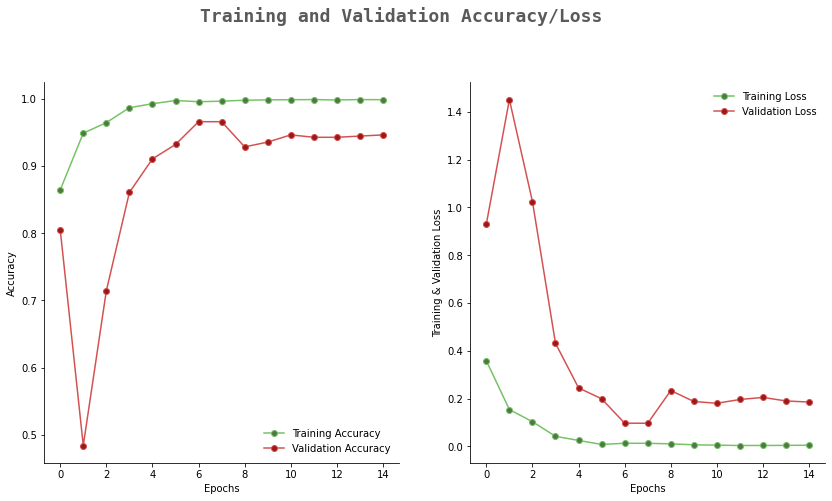

In [20]:
filterwarnings('ignore')

epochs = [i for i in range(15)]
fig, ax = plt.subplots(1,2,figsize=(14,7))
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.text(s='Training and Validation Accuracy/Loss',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=1,x=0.28,alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label ='Training Loss')
ax[1].plot(epochs, val_loss, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

fig.show()

In [21]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

In [22]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       236
           1       0.97      0.98      0.98       165
           2       0.98      1.00      0.99        40
           3       0.99      0.98      0.98       184

    accuracy                           0.99       625
   macro avg       0.98      0.99      0.99       625
weighted avg       0.99      0.99      0.99       625



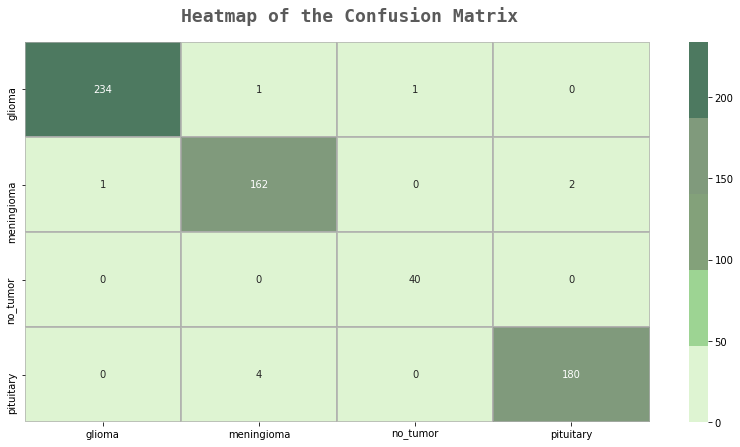

In [23]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,
           cmap=colors_green[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3], fmt="d")
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()

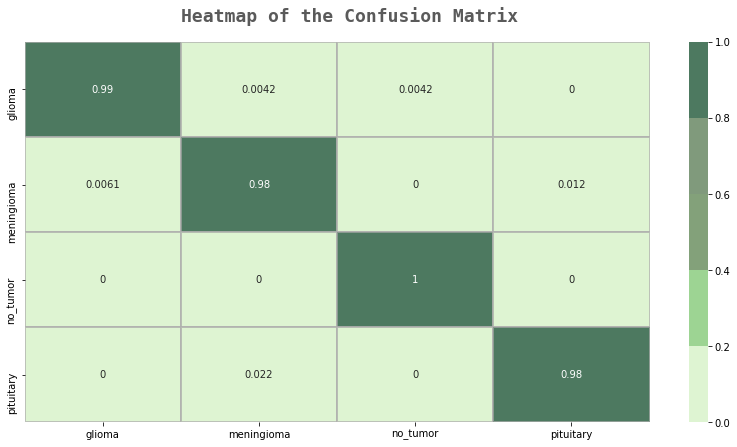

In [24]:
cm = confusion_matrix(y_test_new,pred)


cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

cm

fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(cm,ax=ax,xticklabels=labels,yticklabels=labels,annot=True,
           cmap=colors_green[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()